In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tabulate import tabulate # se debe pegar el siguiente comando en la terminal antes de ejecutar <pip install tabulate> 

Para estimar el número total de carpetas de investigación de 2020 se utilizaron modelos polinomiales de grado uno, dos  y tres, así como splines cúbicos. El proceso se realizó considerando dos agrupaciones de datos: 1) los datos desagregados por mes desde enero de 2016  hasta mayo de 2020; y, 2) la suma por año de 2016 a 2019.

# Estimaciones mensuales

### Descarga de datos

In [7]:
violencia_a = pd.read_csv('denuncias_mensuales.csv')

### Manipulación de los datos 

In [8]:
del violencia_a['index']

In [9]:
del violencia_a['anio']

In [10]:
del violencia_a['mes']

In [11]:
arr = violencia_a.to_numpy()

In [12]:
y = arr[:,1]

In [13]:
x = arr[:,0]

### Modelos polinomilaes de grado 1, 2 y 3

In [14]:
coefficients1 = np.polyfit(x, y, 1)

In [15]:
coefficients2 = np.polyfit(x,y,2)

In [16]:
coefficients3 = np.polyfit(x,y,3)

### Splines cúbicos 

In [17]:
splines = interp1d(x,y,kind = 'cubic')
nevals = 10000
xevals = np.linspace(min(x),max(x),nevals)
yevals = splines(xevals)

In [18]:
y_pol_1 = np.polyval(coefficients1, x)
y_pol_2 = np.polyval(coefficients2, x)
y_pol_3 = np.polyval(coefficients3, x)
y_spl = splines(x)

### Preparación de los datos para diseñar el eje x

In [19]:
violencia_b = pd.read_csv('denuncias_mensuales.csv')

In [20]:
violencia_b['anio'] = violencia_b['anio'].apply(str)

In [21]:
violencia_b['mes'] = violencia_b['mes'].apply(str)

In [22]:
violencia_b['fecha'] = violencia_b['mes']+' '+ violencia_b['anio']

In [23]:
violencia_b = np.array(violencia_b)

In [24]:
g = violencia_b[:,5]

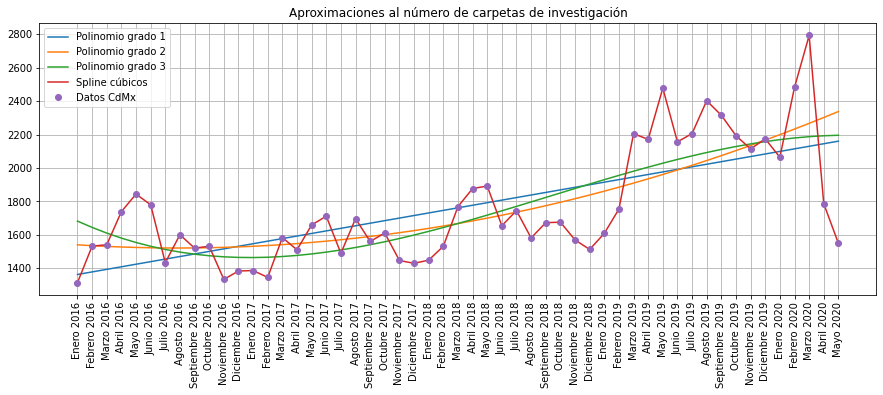

In [25]:
fig = plt.figure(figsize=(15, 5))
plt.plot(g, y_pol_1,
         g, y_pol_2,
         g, y_pol_3,
         g, y_spl, 
         g, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.title("Aproximaciones al número de carpetas de investigación")
plt.xticks(rotation='vertical',fontsize=10)
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.grid(True)
plt.savefig('Aprox_carpetas.png')
plt.show()

### Estimaciones de abril a diciembre de 2020

In [26]:
x_estim = np.array([53,54,55,56,57,58,59])

In [27]:
y_estim_1 = np.polyval(coefficients1, x_estim)
y_estim_2 = np.polyval(coefficients2, x_estim)
y_estim_3 = np.polyval(coefficients3, x_estim)
f = interp1d(x, y_spl, fill_value='extrapolate')
y_estim_spl = f(x_estim)

In [28]:
y_estim_spl

array([1314., 1078.,  842.,  606.,  370.,  134., -102.])

### Unión de los datos para graficar

In [55]:
y1 = np.hstack((y_pol_1,y_estim_1))

In [57]:
y2 = np.hstack((y_pol_2,y_estim_2))

In [58]:
y3 = np.hstack((y_pol_3,y_estim_3))

In [59]:
splin = np.hstack((y_spl,y_estim_spl))

In [60]:
w = ["Junio 2020", "Julio 2020", "Agosto 2020", "Septiembre 2020", "Octubre 2020", "Noviembre 2020", "Diciembre 2020"]

In [61]:
x_eval = np.hstack((g,w))

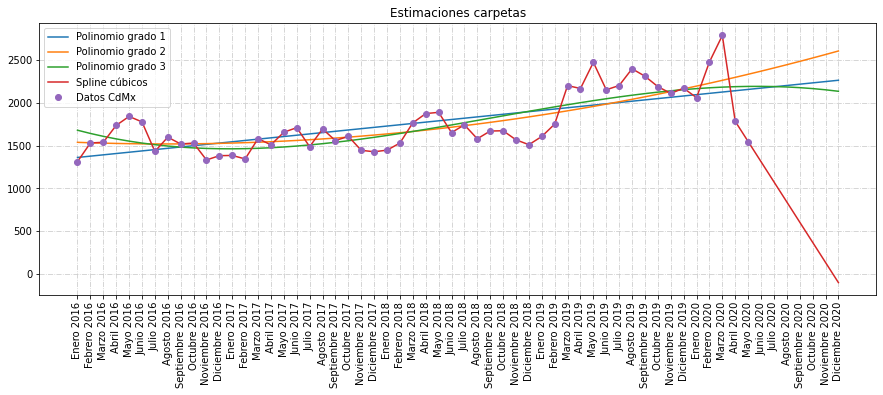

In [68]:
fig = plt.figure(figsize=(15, 5))
plt.plot(x_eval, y1,
         x_eval, y2,
         x_eval, y3,
         x_eval, splin,
         x, y, 'o')
plt.legend(["Polinomio grado 1",
           "Polinomio grado 2",
           "Polinomio grado 3",
           "Spline cúbicos",
           "Datos CdMx"])
plt.rc('grid', linestyle="-.", color='#CCCCCC')
plt.xticks(rotation='vertical',fontsize=10)
plt.grid(True)
plt.savefig('Estim_carpetas.png')
plt.title("Estimaciones carpetas")
plt.show()

### Error cuadrático medio 

In [69]:
def MSE(y, y_hat):
    """
    Compute mean squared error.
    See: https://en.wikipedia.org/wiki/Mean_squared_error
    Args:
        y (numpy 1d array of floats): actual values of data.
        y_hat (numpy 1d array of floats): estimated values via model.
    Returns:
        ecm (float): mean squared error result.
    """
    m = len(y)
    error = (y-y_hat)**2
    sum_error = sum(error)
    ecm = sum_error/m
    return ecm

In [70]:
MSE_pol_1 = MSE(y, y_pol_1)
MSE_pol_2 = MSE(y, y_pol_2)
MSE_pol_3 = MSE(y, y_pol_3)
MSE_spl = MSE(y, y_spl)

In [73]:
print('Error cuadrático medio')
print(tabulate([['Polinomio 1º', MSE_pol_1], 
                ['Polinomio 2º', MSE_pol_2],
                ['Polinomio 3º', MSE_pol_3],
                ['Spline cúbico', MSE_spl] ], 
               headers=['Modelo', 'Error cuadrático medio (ECM)'],
              floatfmt=".25f"))

Error cuadrático medio
Modelo            Error cuadrático medio (ECM)
-------------  -------------------------------
Polinomio 1º   61125.8476310881087556481361389
Polinomio 2º   54092.4191125236466177739202976
Polinomio 3º   50483.3170088549959473311901093
Spline cúbico      0.0000000000000000000000000


### Conclusiones

#### Datos mensuales


El modelo que presentó un mejor ajuste para los datos mensuales fue el spline cúbico, con error cuadrático medio de .000. Lo anterior debido a que se ajusta a cada uno de los puntos observados. Sin embargo,  debido a la caída que se presenta a partir de marzo de 2020  el modelo nos da un cierre para diciembre de -102 carpetas de investigación.  Los otros modelos presentan datos mucho más razonables, aunque las diferencias entre los datos proporcionados por la Ciudad de México y los estimados son muy grandes Dados estos resultados se inició el trabajo con los datos agrupados de forma anual.
